In [54]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Neural Networks and Deep Learning
# 10. Introduction to Artificial Neural Networks with Keras

**Backpropagation** : algorithm to train *Multilayer Perceptrons*  (deep learning)  

for each training instance, the
backpropagation algorithm first makes a prediction (forward pass) and measures the error, then goes
through each layer in reverse to measure the error contribution from each connection (reverse pass),
and finally tweaks the connection weights to reduce the error (Gradient Descent step).

Deep learning library :

Keras is API that work with backend engine like TensorFlow, theano, etc.  
Pytorch is also popular API + engines from facebook

In [4]:
# we will use keras version implemented by tensorFlow team
from tensorflow import keras
keras.__version__ 

'2.2.4-tf'

## Example with Keras Classification : Fashion MNIST image classification

In [6]:
#load data with keras
# fashion_mnist = keras.datasets.fashion_mnist
(X,y) , (Xtest,ytest) = fashion_mnist.load_data()
X.shape , X.dtype

((60000, 28, 28), dtype('uint8'))

since we are going to train the neural network using Gradient
Descent, ***we must scale the input features***. For simplicity, we’ll scale the pixel intensities down to the
0–1 range

In [17]:
# split X,y in to train and validation set
Xtrain , Xval= X[5000:]/255 , X[:5000]/255  # devide by max value 255 to makes it in 0-1
ytrain , yval= y[5000:] , y[:5000]

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
#the first image in the training set represents a coat:
ytrain[0] ,class_names[ytrain[0]]

(4, 'Coat')

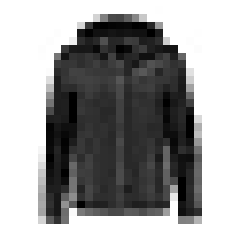

In [23]:
plt.imshow(Xtrain[0], cmap="binary")
plt.axis('off')
plt.show()

In [25]:
# classification MLP with two hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))  # "softmax" for muticlass, "sigmoid" for binary

# or pass it in Sequential
# model = keras.models.Sequential([
                                    # keras.layers.Flatten(input_shape=[28, 28]),
                                    # keras.layers.Dense(300, activation="relu"),
                                    # keras.layers.Dense(100, activation="relu"),
                                    # keras.layers.Dense(10, activation="softmax")
                                    # ])

The first line creates a Sequential model. This is the simplest kind of Keras model for
neural networks that are just composed of a single stack of layers connected sequentially.
This is called the Sequential API.

Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to
convert each input image into a 1D array: if it receives input data X, it computes
X.reshape(-1, 1). This layer does not have any parameters; it is just there to do some
simple preprocessing. Since it is the first layer in the model, you should specify the
input_shape, which doesn’t include the batch size, only the shape of the instances.
Alternatively, you could add a keras.layers.InputLayer as the first layer, setting
input_shape=[28,28].

Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation
function. Each Dense layer manages its own weight matrix, containing all the connection
weights between the neurons and their inputs. It also manages a vector of bias terms (one per
neuron). When it receives some input data, it computes Equation 10-2.
Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation
function.

Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax
activation function (because the classes are exclusive).

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.layers

In [33]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(hidden1.name),weights

dense


(None,
 array([[ 0.0223158 , -0.03352105,  0.02669309, ..., -0.06958773,
         -0.07258094, -0.02817009],
        [-0.04857974, -0.05002204,  0.04955743, ...,  0.02511395,
          0.01091783,  0.00739525],
        [-0.0059232 ,  0.02604344,  0.00482537, ..., -0.03152025,
         -0.05899241,  0.05354139],
        ...,
        [ 0.04905962,  0.03323015,  0.01455788, ...,  0.07430843,
         -0.04622167,  0.01480616],
        [-0.05094047, -0.02817287,  0.03824581, ...,  0.04072347,
          0.04518092, -0.04512015],
        [ 0.01115239, -0.00449917,  0.00434219, ...,  0.01223318,
         -0.03971261, -0.07010337]], dtype=float32))

Then call its $compile()$ method to specify the loss function and the
optimizer to use

In [34]:
model.compile(loss="sparse_categorical_crossentropy", # "categorical_crossentropy","binary_crossentropy"
              optimizer="sgd",  #optimizer=keras.optimizers.SGD(lr=???) to specify learning rate
              metrics=["accuracy"])

In [36]:
#train
history = model.fit(Xtrain, ytrain, epochs=30,
                    validation_data=(Xval, yval))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.7113 - accuracy: 0.7684 - val_loss: 0.5049 - val_accuracy: 0.8316
Epoch 2/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.4876 - accuracy: 0.8296 - val_loss: 0.4393 - val_accuracy: 0.8516
Epoch 3/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.4432 - accuracy: 0.8459 - val_loss: 0.4831 - val_accuracy: 0.8320
Epoch 4/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.4152 - accuracy: 0.8550 - val_loss: 0.3930 - val_accuracy: 0.8668
Epoch 5/30
55000/55000 [==============================] - 3s 50us/sample - loss: 0.3965 - accuracy: 0.8596 - val_loss: 0.4002 - val_accuracy: 0.8624
Epoch 6/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.3806 - accuracy: 0.8655 - val_loss: 0.3769 - val_accuracy: 0.8704
Epoch 7/30
55000/55000 [==============================] -

In [37]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

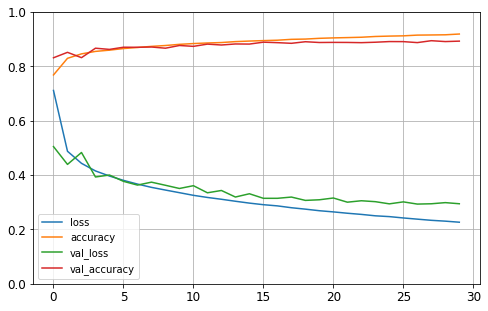

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [43]:
#evaluate with test set
model.evaluate(Xtest, ytest)

10000/10000 [==============================] - 0s 35us/sample - loss: 64.8183 - accuracy: 0.8468


[64.81831487789154, 0.8468]

Using the model to make predictions

In [46]:
Xnew = Xtest[:3]
y_proba = model.predict(Xnew)
y_proba.round(3)
#the model estimates one probability per class, from class 0 to class 9.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Example with Keras Regression : California housing

In [52]:
#load housing data (no cat and missing value version)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [90]:
X_train.shape[1:]

(8,)

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [92]:
model.compile(loss="mean_squared_error",
              optimizer="sgd")
#fit
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
# evaluate
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.8476 - val_loss: 19.4143
Epoch 2/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5441 - val_loss: 17.4337
Epoch 3/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5326 - val_loss: 0.4007
Epoch 4/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4266 - val_loss: 0.3907
Epoch 5/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4129 - val_loss: 0.3843
Epoch 6/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4030 - val_loss: 0.3729
Epoch 7/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3942 - val_loss: 0.3722
Epoch 8/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3883 - val_loss: 0.3646
Epoch 9/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3828 - val

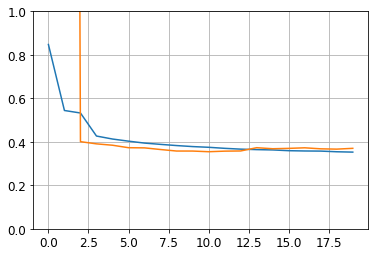

In [93]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [69]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

## Building Complex Models Using the Functional API

Example of a nonsequential neural network, Wide & Deep neural network. It connects all or
part of the inputs directly to the output layer makes it
possible for the neural network to learn both deep patterns (using the deep path) and simple rules
(through the short path)

In [77]:
# let build to tackle california problem
input_ = keras.layers.Input(shape= X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [95]:
model.compile(loss = 'mean_squared_error',
             optimizer = 'sgd')

history = model.fit(X_train, y_train,epochs = 20, validation_data = (X_valid,y_valid))
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 13us/sample - loss: 0.3411


Loss is better than normal model 0.35 -> 0.34

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [96]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

when we call the fit() method,
instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_A,
X_train_B): one per input.

In [119]:
model.compile(loss = 'mse',
             optimizer = keras.optimizers.SGD(lr=1e-3)) # learning rate
history = model.fit((X_train[:,:5],X_train[:,2:]), y_train,epochs= 20 ,
                    validation_data= ((X_valid[:,:5],X_valid[:,2:]),y_valid))
#eval
mse_test = model.evaluate((X_test[:,:5],X_test[:,2:]), y_test)
y_pred = model.predict ((X_test[:,:5],X_test[:,2:]))

5160/5160 [==============================] - 0s 17us/sample - loss: 0.3699
